# <center>CAR PRICE PREDICTION</center>

# Introductions

<img src="car-pics.png" width="100%" height="70px">
Its important to know the variable affecting the selling price of car and to be able to predict the selling price of car using other available product.

# About The Dataset

The Dataset was downloaded from www.Kaggle.com
The data is on shop customers. it consists of 301 records and 9 columns:
 - Car_Name
 - Year
 - Selling_Price
 - Present_Price
 - Kms_Driven	
 - Fuel_Type	
 - Seller_Type
 - Transmission
 - Owner

## Importing Libraries and Loading Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
car_data = pd.read_csv('cardata.csv')
car_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Cleaning of Data

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
print( car_data.shape)
print('The numbes of rows of the dataset is : '+ str(car_data.shape[0]))
print('The numbers of columns of the dataset is : '+ str(car_data.shape[1]))

(301, 9)
The numbes of rows of the dataset is : 301
The numbers of columns of the dataset is : 9


In [5]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(car_data.Car_Name.unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [7]:
print(car_data.Fuel_Type.unique())

['Petrol' 'Diesel' 'CNG']


In [8]:
print(car_data.Seller_Type.unique())

['Dealer' 'Individual']


In [9]:
print(car_data.Transmission.unique())

['Manual' 'Automatic']


In [10]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Exploratory Analysis

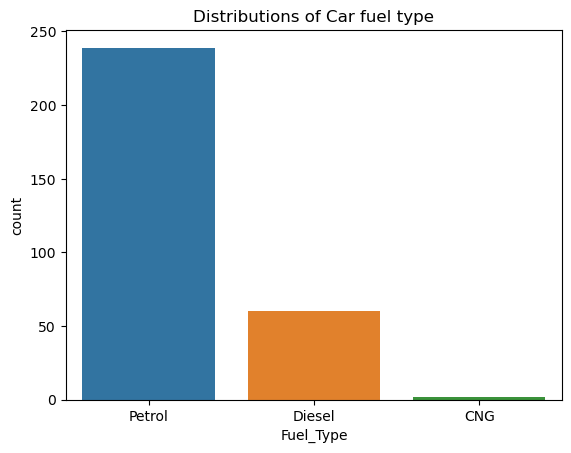

In [11]:
sns.countplot(data=car_data, x="Fuel_Type")
plt.title('Distributions of Car fuel type')
plt.show()

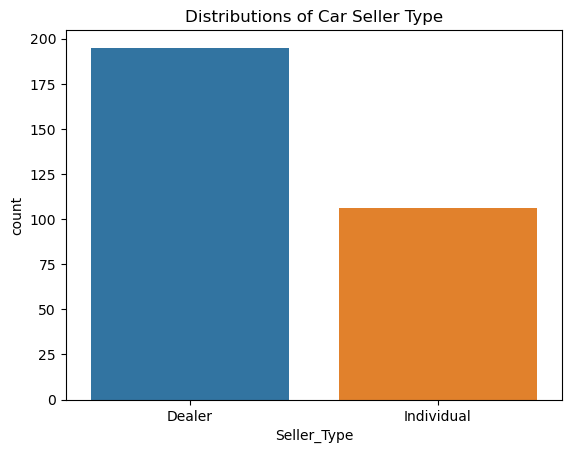

In [12]:
sns.countplot(data=car_data, x="Seller_Type")
plt.title('Distributions of Car Seller Type')
plt.show()

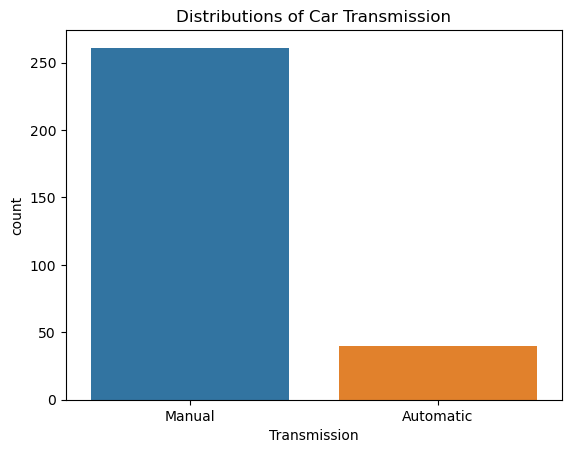

In [13]:
sns.countplot(data=car_data, x="Transmission")
plt.title('Distributions of Car Transmission')
plt.show()

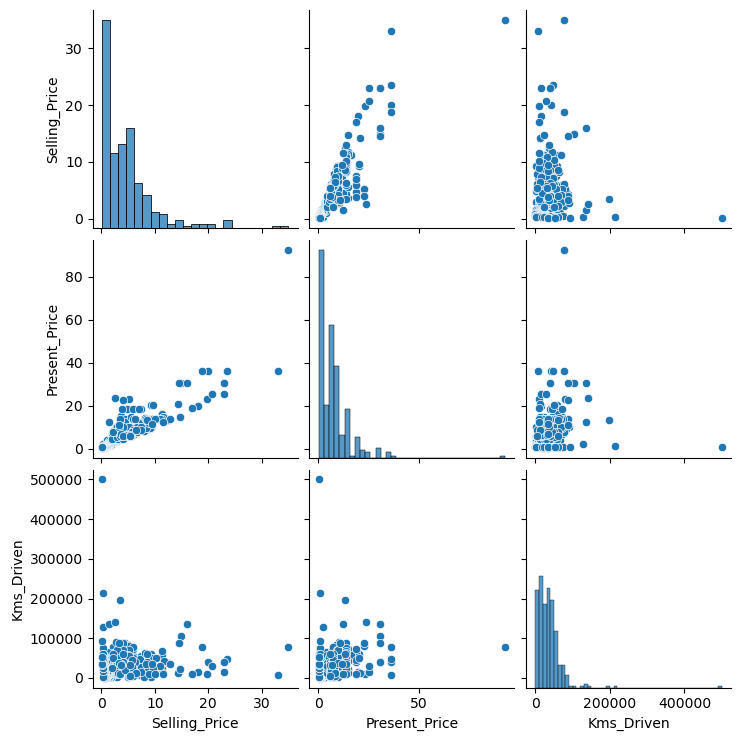

In [14]:
car_data_2 = car_data[["Selling_Price",	"Present_Price","Kms_Driven"]]
sns.pairplot(data=car_data_2)
plt.show()

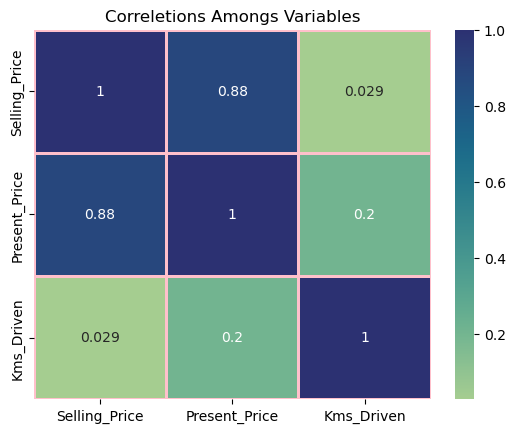

In [15]:
sns.heatmap(data=car_data_2.corr(), annot=True, lw=1, linecolor='pink', cmap='crest')
plt.title('Correletions Amongs Variables')
plt.show()

In [16]:
car_data['Fuel_Type'].replace({'Petrol': 2., 'Diesel':3, 'CNG':4}, inplace=True)
car_data['Seller_Type'].replace({'Dealer': 2., 'Individual':3}, inplace=True)
car_data['Transmission'].replace({'Manual': 2., 'Automatic':3, 'CNG':4}, inplace=True)
car_data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,2.0,2.0,2.0,0
292,jazz,2016,6.40,8.40,12000,2.0,2.0,2.0,0
293,city,2010,3.25,9.90,38000,2.0,2.0,2.0,0
294,amaze,2014,3.75,6.80,33019,2.0,2.0,2.0,0
295,city,2015,8.55,13.09,60076,3.0,2.0,2.0,0
296,city,2016,9.50,11.60,33988,3.0,2.0,2.0,0
297,brio,2015,4.00,5.90,60000,2.0,2.0,2.0,0
298,city,2009,3.35,11.00,87934,2.0,2.0,2.0,0
299,city,2017,11.50,12.50,9000,3.0,2.0,2.0,0
300,brio,2016,5.30,5.90,5464,2.0,2.0,2.0,0


## Lasso Regression

In [17]:
X= car_data.drop(['Selling_Price','Car_Name','Year' ], axis=1).values
Y= car_data['Selling_Price'].values.reshape(-1,1)
print(X.shape)
print(Y.shape)

(301, 6)
(301, 1)


### Splitting Dataset

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

### Fitting Lasso Model

In [19]:
model= Lasso(alpha=0.15)
model.fit(x_train,y_train)

Lasso(alpha=0.15)

### Prediction

In [20]:
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.8955373918969801

### Model Evaluation

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.9849666057389505
Mean Squared Error: 1.7412586521855824
Root Mean Absolute Error: 0.9924548381356959
R2 Score: 0.8955373918969801


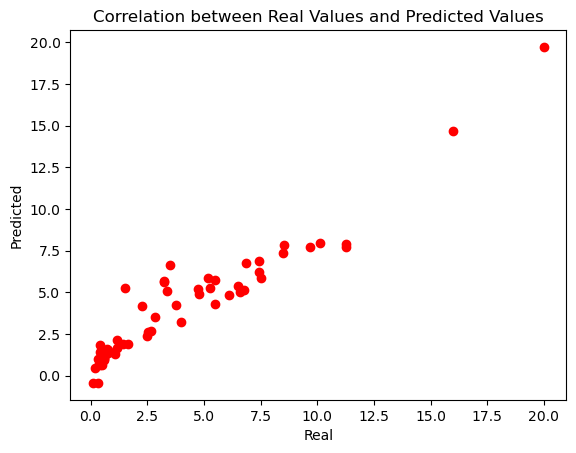

In [22]:
plt.scatter(y_test, y_pred , color='red')
plt.title("Correlation between Real Values and Predicted Values")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()